<a href="https://colab.research.google.com/github/tighu20/TweetSentimentExtractionDecisionMaking/blob/master/CrossInstall_Tweets_Showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tweepy

In [0]:
import tweepy
consumer_key="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
consumer_secret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
access_token="XXXXXXXXXXXXXXXXXXXXXXXXXXX-XXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token_secret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [0]:
import pandas as pd
def get_related_tweets(key_word):

    twitter_users = []
    tweet_time = []
    tweet_string = [] 
    for tweet in tweepy.Cursor(api.search,q=key_word, count=1000).items(1000):
            if (not tweet.retweeted) and ('RT @' not in tweet.text):
                if tweet.lang == "en":
                    twitter_users.append(tweet.user.name)
                    tweet_time.append(tweet.created_at)
                    tweet_string.append(tweet.text)
                    #print([tweet.user.name,tweet.created_at,tweet.text])
    df = pd.DataFrame({'name':twitter_users, 'time': tweet_time, 'tweet': tweet_string})
    
    return df

In [0]:
df = get_related_tweets("last dance")

In [10]:
df.shape

(249, 3)

In [11]:
df.head(10)

,name,time,tweet
0,Jaylin Lucas,2020-05-21 04:35:33,Just finished The Last Dance and it’s got me t...
1,Christian,2020-05-21 04:35:02,@LjsGoat “its time for one last dance” https:/...
2,𝔸𝕝𝕚𝕤𝕙𝕒,2020-05-21 04:34:57,I wish the Last Dance documentary on Netflix w...
3,D. Michael ⭐⭐⭐⭐⭐⭐⭐⭐,2020-05-21 04:34:46,reboot save the last dance https://t.co/Wo7GS6...
4,David 🦦,2020-05-21 04:34:45,The last dance was such a great series https:/...
5,al,2020-05-21 04:33:59,The Last Dance is phenomenal thus far....Chica...
6,wooder,2020-05-21 04:33:27,Finally getting around to watching the last da...
7,Cole,2020-05-21 04:33:25,Finally watched the last 2 episodes of the Las...
8,Annalise Coleman,2020-05-21 04:33:17,I unfortunately am addicted to watching the la...
9,The Flood,2020-05-21 04:32:40,"Finished ""The Last Dance"" - what a ride!"


Number of Positive Tweets 222
Number of Negative Tweets 26


Text(0.5, 1.0, 'The Last Dance sentiment comparision')

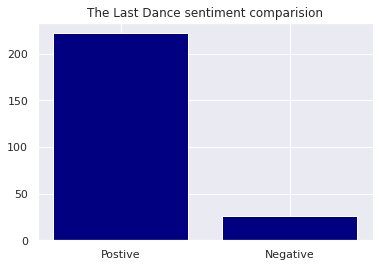

In [15]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
df['sentiment'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df_pos = df[df['sentiment'] > -0.1]
df_neg = df[df['sentiment'] < -0.1]
print("Number of Positive Tweets", len(df_pos))
print("Number of Negative Tweets", len(df_neg))
sns.set()
labels = ['Postive', 'Negative']
heights = [len(df_pos), len(df_neg)]
plt.bar(labels, heights, color = 'navy')
plt.title("The Last Dance sentiment comparision")



In [0]:
df1 = get_related_tweets("Mandalorian")

In [20]:
df1.shape

(428, 3)

In [21]:
df1.head(5)

,name,time,tweet
0,JASON ZUMWALT,2020-05-21 04:42:59,If you’re a Mandalorian fan I can not recommen...
1,rebel,2020-05-21 04:42:52,.@SuspendedFanim1 \n\nTimothy Oliphant will pl...
2,Stephen Hester,2020-05-21 04:41:40,Im just\nIm gonna say it\nCaptain Rex walked s...
3,Borri,2020-05-21 04:39:45,Why am I getting Mandalorian ads in May
4,Valerie,2020-05-21 04:37:12,I'm watching the disney gallery episodes from ...


Number of Positive Tweets 383
Number of Negative Tweets 42


Text(0.5, 1.0, 'Mandalorian sentiment comparision')

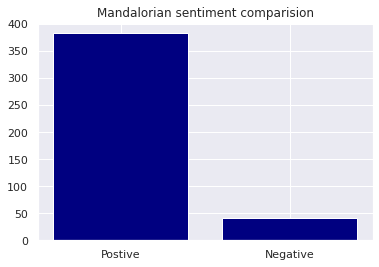

In [22]:
df1['sentiment'] = df1['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df_pos = df1[df1['sentiment'] > -0.1]
df_neg = df1[df1['sentiment'] < -0.1]
print("Number of Positive Tweets", len(df_pos))
print("Number of Negative Tweets", len(df_neg))
sns.set()
labels = ['Postive', 'Negative']
heights = [len(df_pos), len(df_neg)]
plt.bar(labels, heights, color = 'navy')
plt.title("Mandalorian sentiment comparision")